In [1]:
# %matplotlib notebook
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [2]:
companies_df = pd.read_csv("sp500/sp500_companies.csv")
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Symbol               500 non-null    object 
 1   Shortname            500 non-null    object 
 2   Longname             500 non-null    object 
 3   Sector               500 non-null    object 
 4   Industry             500 non-null    object 
 5   Currentprice         500 non-null    float64
 6   Marketcap            500 non-null    float64
 7   Ebitda               469 non-null    float64
 8   Revenuegrowth        499 non-null    float64
 9   City                 500 non-null    object 
 10  State                481 non-null    object 
 11  Country              500 non-null    object 
 12  Fulltimeemployees    472 non-null    float64
 13  Longbusinesssummary  500 non-null    object 
 14  Weight               500 non-null    float64
dtypes: float64(6), object(9)
memory usage: 5

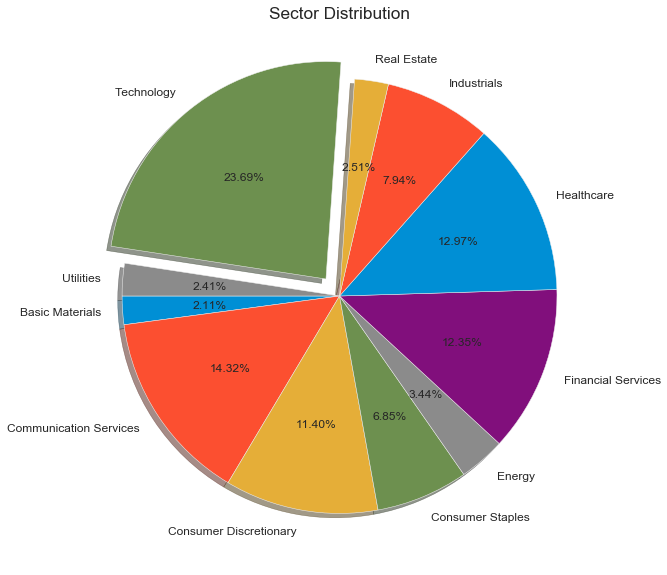

In [3]:
# Getting the data
sector_distribution = companies_df.groupby("Sector")["Marketcap"].sum()
sector_distribution

# Creat the chart
plt.rc('font', size=12)  
explode = (0,0,0,0,0,0,0,0,0,0.1,0)
plt.figure(figsize=(20, 12.36))
sector_distribution.plot(kind = "pie",explode=explode, shadow=True,startangle=180,autopct="%1.2f%%",figsize=(10,10))
plt.axis("off")

# Set appearance
plt.title("Sector Distribution")

plt.savefig("Sector Distribution.png")



plt.show()


In [4]:
total_start = datetime(2001,3,1)
total_end = datetime(2022,3,26)

# The tech stocks we'll use for this analysis
total_index_list = ['^GSPC']
total_index_name = ['S&P 500']
# Set up End and Start times for data grab
total_index =  yf.download(total_index_list, total_start, total_end)

[*********************100%***********************]  1 of 1 completed


In [5]:
total_index

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-02-28,1257.939941,1263.469971,1229.650024,1239.939941,1239.939941,1225300000
2001-03-01,1239.939941,1241.359985,1214.500000,1241.229980,1241.229980,1294900000
2001-03-02,1241.229980,1251.010010,1219.739990,1234.180054,1234.180054,1294000000
2001-03-05,1234.180054,1242.550049,1234.040039,1241.410034,1241.410034,929200000
2001-03-06,1241.410034,1267.420044,1241.410034,1253.800049,1253.800049,1091800000
...,...,...,...,...,...,...
2022-03-18,4407.339844,4465.399902,4390.569824,4463.120117,4463.120117,6681510000
2022-03-21,4462.399902,4481.750000,4424.299805,4461.180176,4461.180176,3961050000
2022-03-22,4469.100098,4522.000000,4469.100098,4511.609863,4511.609863,3962880000


<Figure size 576x360 with 0 Axes>

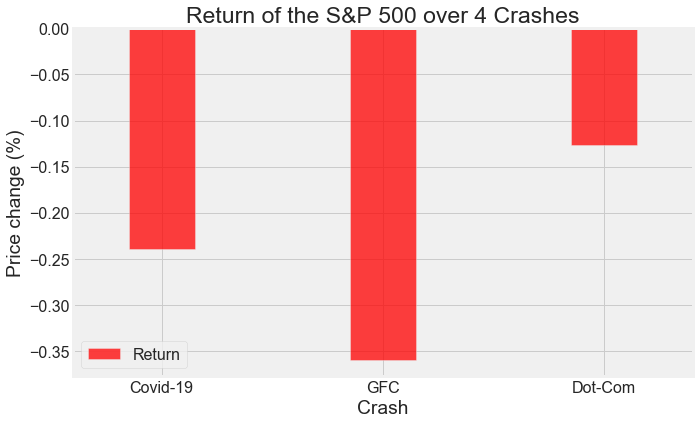

In [8]:

Covid_19_period = ['2020-2-3','2020-4-1']
GFC_period = ['2007-12-3','2009-6-1']
Dot_Com_period = ['2001-3-1','2001-11-1']
period_list = ['Covid-19','GFC','Dot-Com']
total_retuen = []

for x,y in Covid_19_period,GFC_period,Dot_Com_period:
    start_price = float(total_index.loc[total_index.index==x,"Adj Close"].values)
    end_price = float(total_index.loc[total_index.index== y,"Adj Close"].values)
    total_retuen.append((end_price-start_price)/start_price)
total_retuen
total_return_df=pd.DataFrame({'Return': total_retuen})
total_return_df.index = period_list
plt.figure(figsize=(8,5))
plt.rc('font', size=16)  
total_return_df.plot(kind="bar",color = 'r', alpha=0.75, align="center",width=0.3,figsize=(10, 6.18))
plt.xticks(rotation=0)
# Set appearance
plt.title(f"Return of the S&P 500 over 4 Crashes")
plt.xlabel("Crash")
plt.ylabel("Price change (%)")
plt.tight_layout()
plt.savefig(f"Return of the S&P 500 over 4 Crashes.png")      

In [26]:
# Covid 19  - 2020,2,1 - 2020,4,1
# Financial crisis (GFC) - 2007,12,1 - 2009,6,1
# Dot-Com bubble - 2001,3,1 - 2001,11,1



Period = "Covid-19"
this_year_start = datetime(2020,2,1)
this_year_end = datetime(2020,4,1)

# The tech stocks we'll use for this analysis
# SP_ID = ['^GSPC']
# SP_name = ["S&P500"]
sector_list = ['^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
sector_name = ["Financials","Consumer Discretionary","Consumer Staples","Health","Industrials","Information Tech","Materials","Real Estate","Tele Services","Utilities","Energy"]
# Set up End and Start times for data grab
# sector_list = ['^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
thisyear = ['^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
# SP_ID = ['^GSPC']#     thisyear[sector_list.index(stock)] = globals()[stock] = yf.download(stock, this_year_start, this_year_end)
# SP_name = ["S&P500"]
for stock in sector_list: 
#     thisyear[sector_list.index(stock)] = globals()[stock] = yf.download(stock, this_year_start, this_year_end)
    thisyear[sector_list.index(stock)] = yf.download(stock, this_year_start, this_year_end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [27]:
thisyear[0]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-31,507.350006,507.350006,495.040009,497.100006,497.100006,352715900
2020-02-03,497.100006,504.970001,497.100006,500.059998,500.059998,261217400
2020-02-04,500.059998,509.809998,500.059998,505.250000,505.250000,267659100
2020-02-05,505.250000,515.559998,505.250000,515.200012,515.200012,288915800
2020-02-06,515.200012,517.780029,513.080017,514.330017,514.330017,251119700
2020-02-07,514.330017,514.330017,510.369995,512.489990,512.489990,204365500
2020-02-10,512.489990,513.570007,510.600006,513.559998,513.559998,186573400
2020-02-11,513.559998,517.929993,513.559998,515.630005,515.630005,200197700
2020-02-12,515.630005,519.770020,515.299988,516.010010,516.010010,199870200


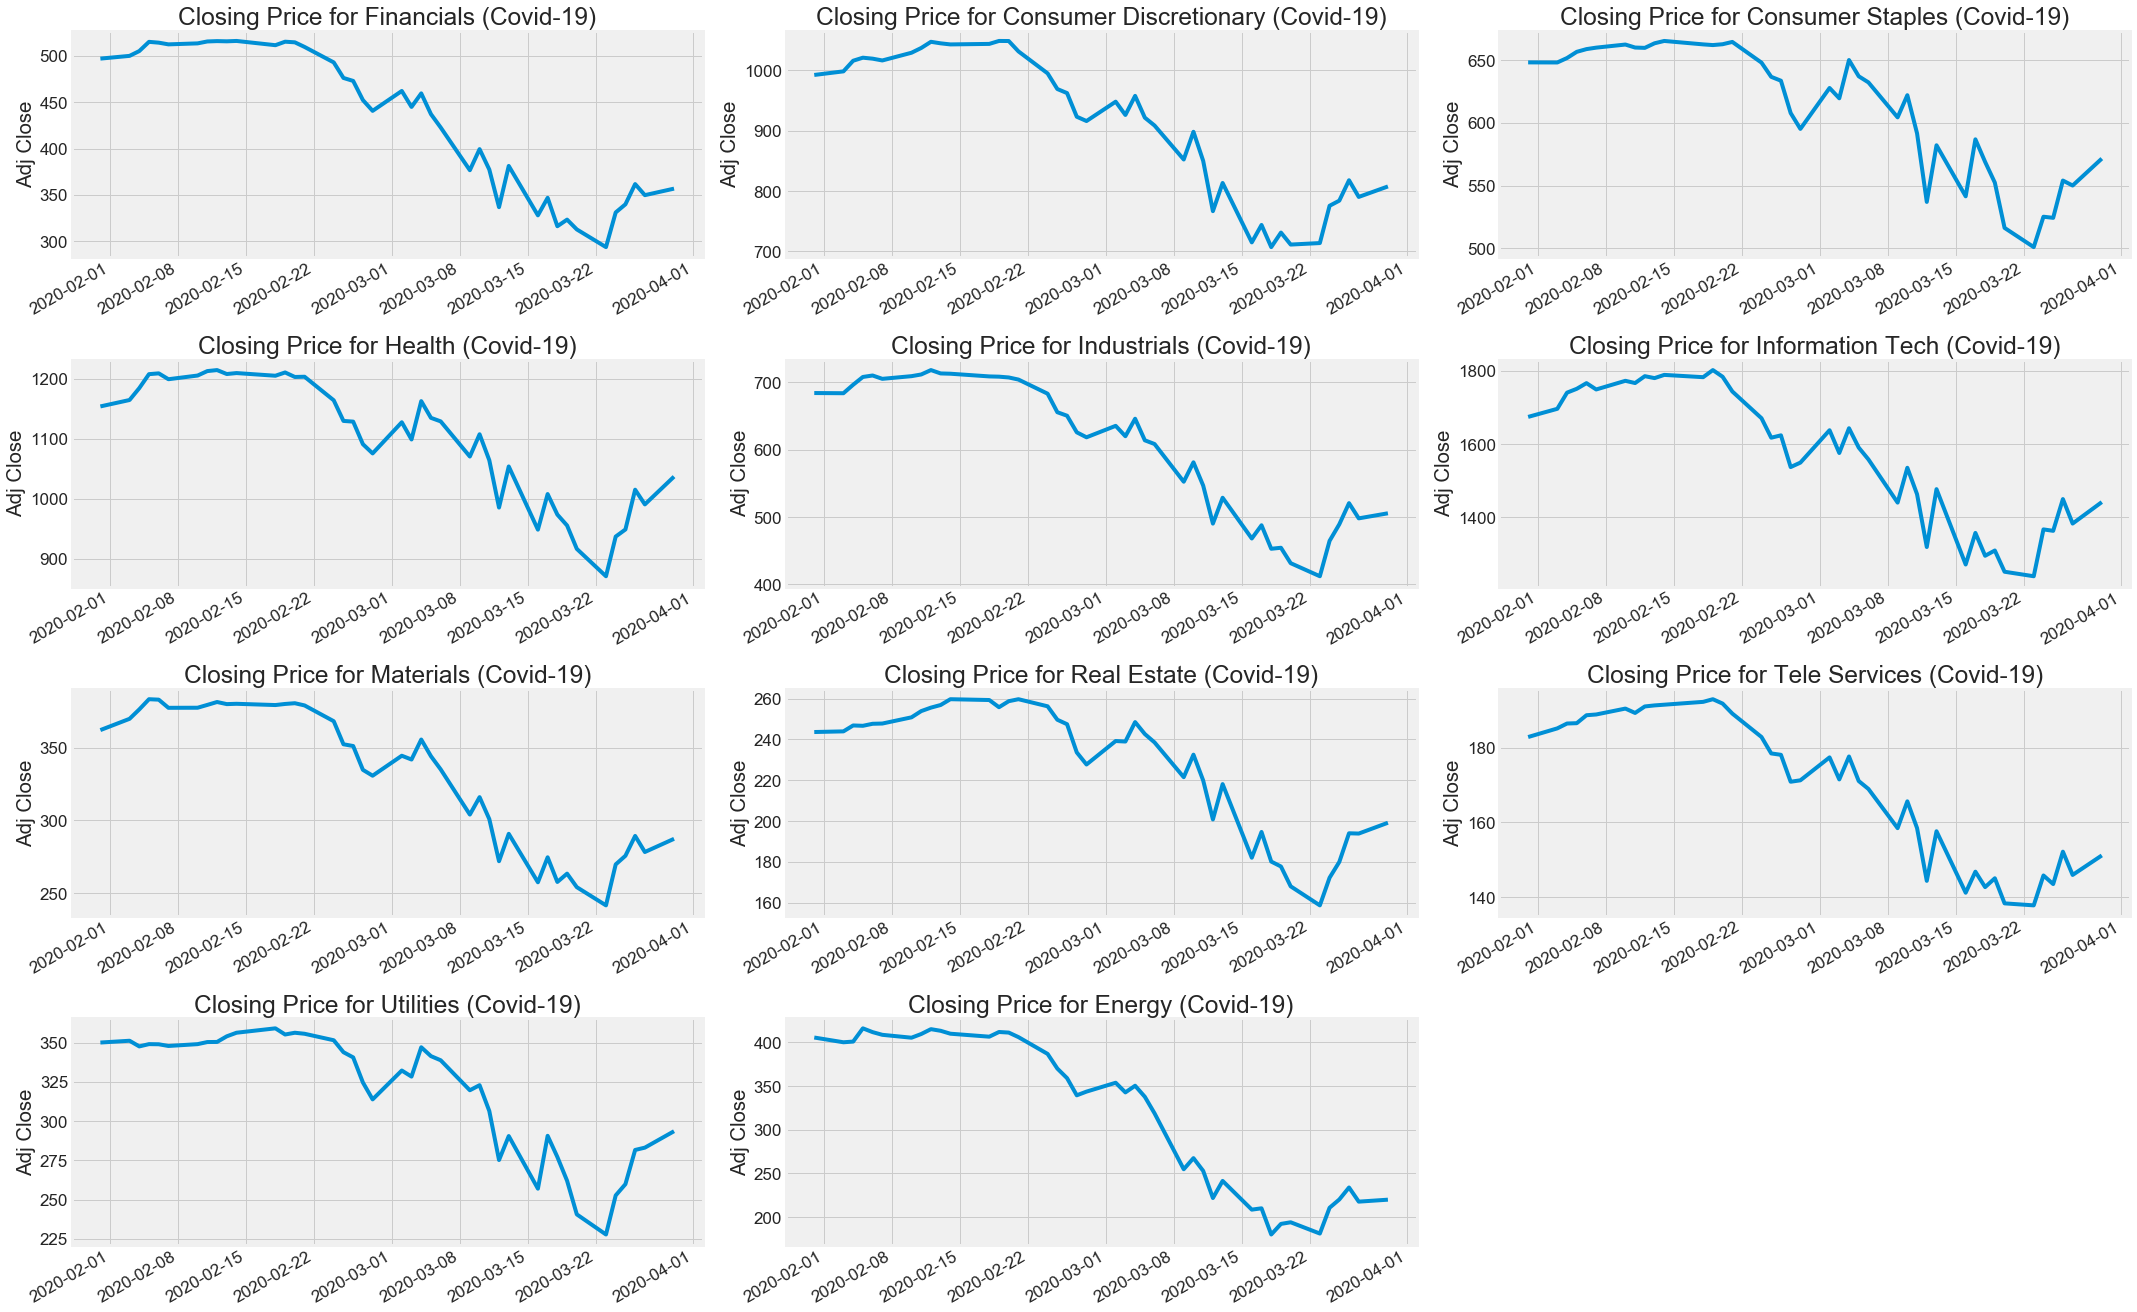

In [28]:
plt.figure(figsize=(30, 18.54))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.rc('font', size=17)  

for i, sector in enumerate(sector_list, 1):
    plt.subplot(4, 3, i)
    thisyear[i-1]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price for {sector_name[i - 1]} ({Period})")
plt.tight_layout()
plt.savefig(f"Adj Close Change by Sectors ({Period}).png")


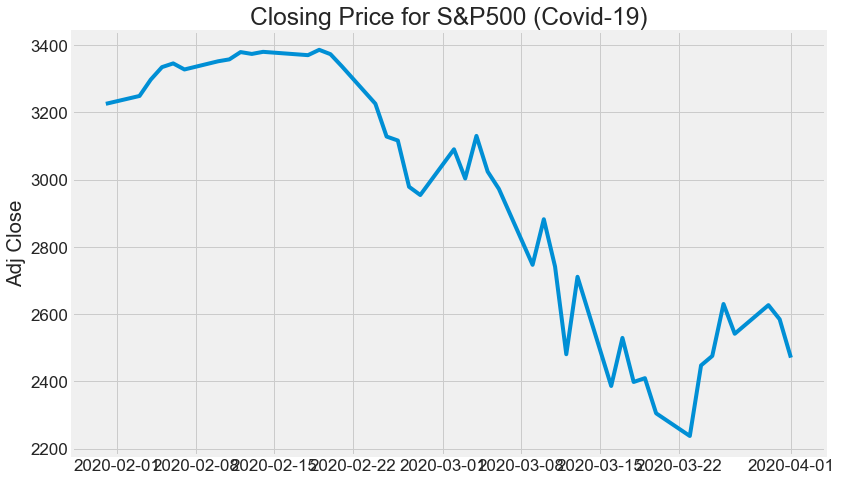

In [29]:
SP500_df = pd.DataFrame(DataReader('^GSPC', 'yahoo', this_year_start, this_year_end)['Adj Close'])
plt.figure(figsize=(12, 7))
plt.plot(SP500_df.index,SP500_df['Adj Close'])
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price for S&P500 ({Period})")
plt.tight_layout()
plt.savefig(f"Adj Close Change for S&P500 ({Period}).png")

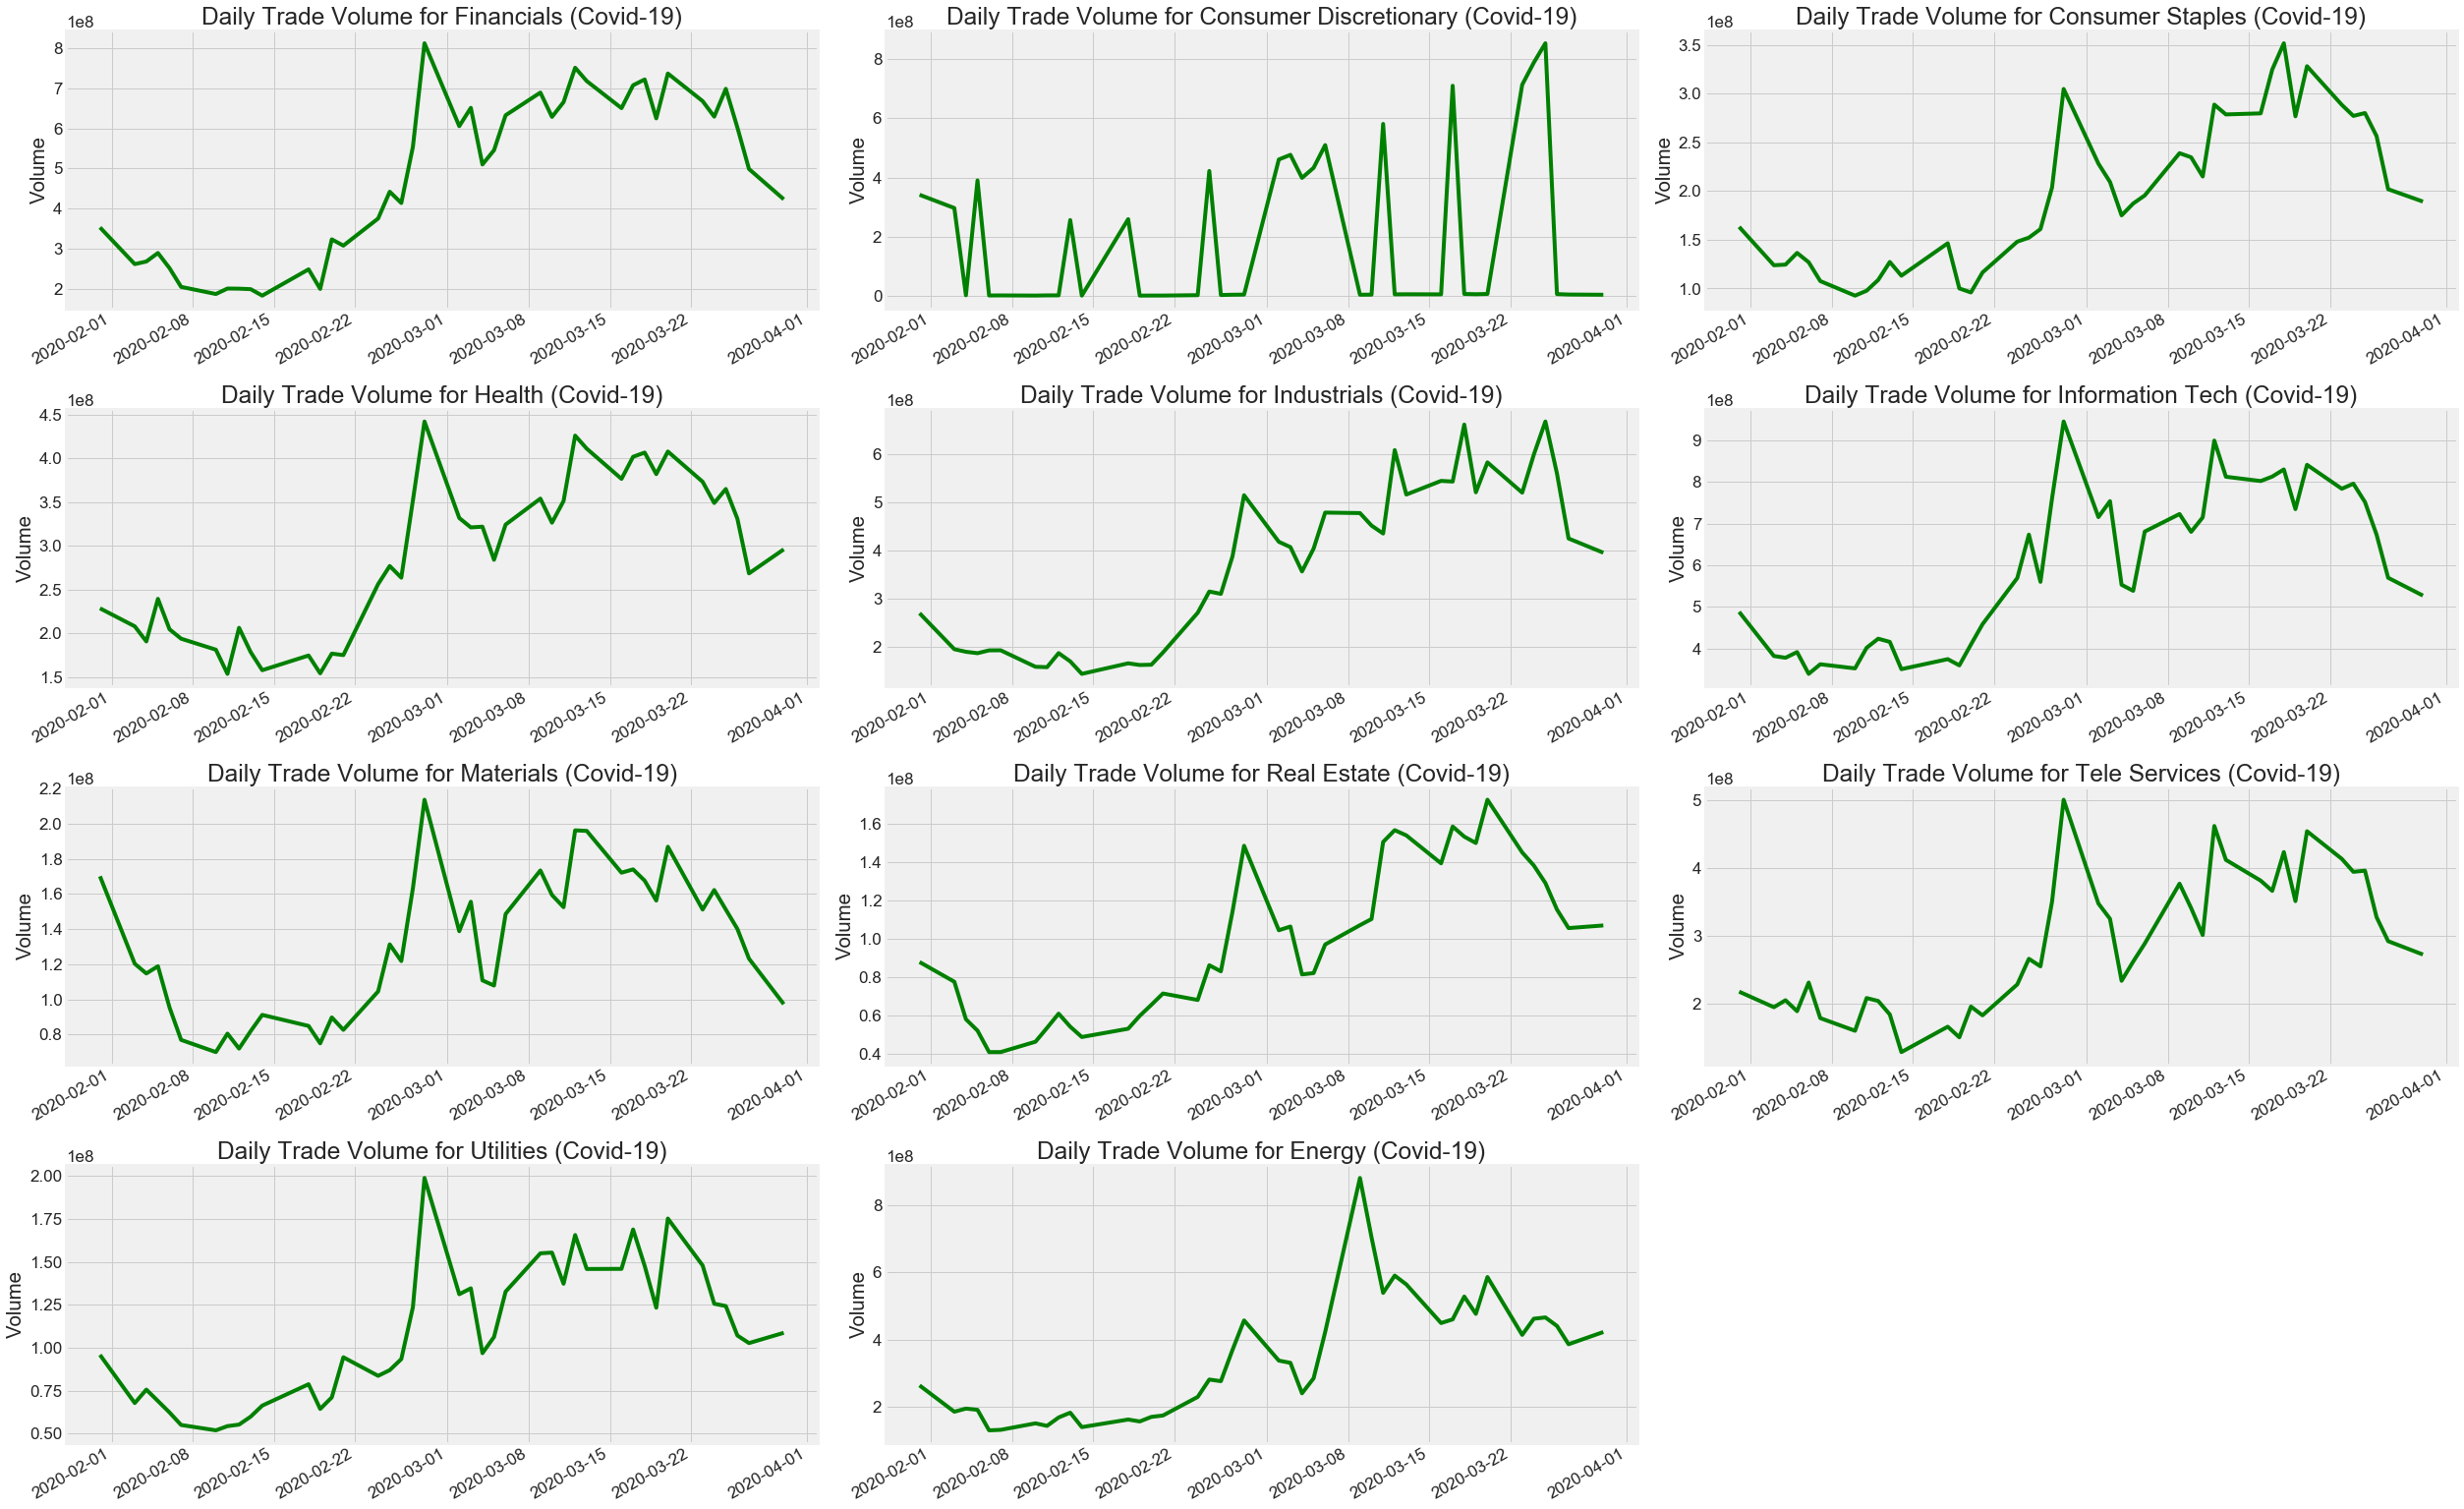

In [30]:
plt.figure(figsize=(35, 21.63))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.rc('font', size=17)  


for i, sector in enumerate(sector_list, 1):
    plt.subplot(4, 3, i)
    thisyear[i-1]['Volume'].plot(color="g")

    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Daily Trade Volume for {sector_name[i - 1]} ({Period})")
plt.tight_layout()
plt.savefig(f"Daily Trade Volume by Sectors ({Period}).png")

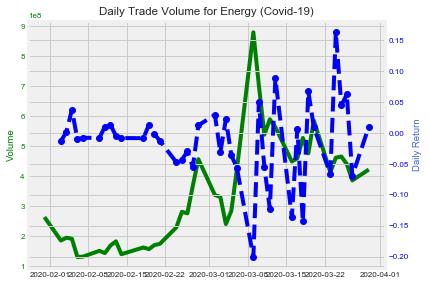

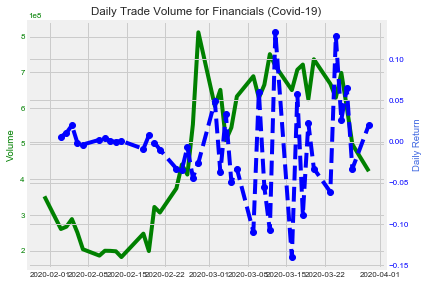

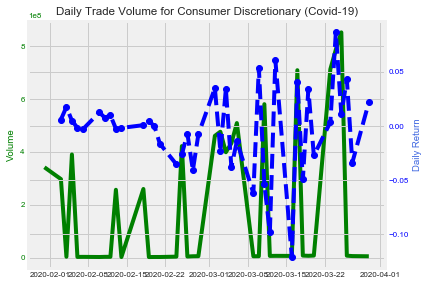

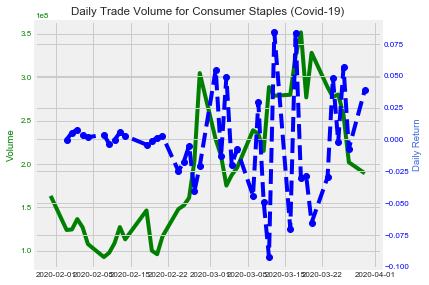

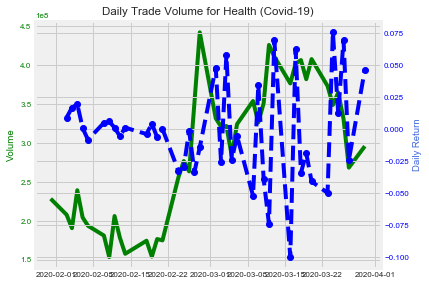

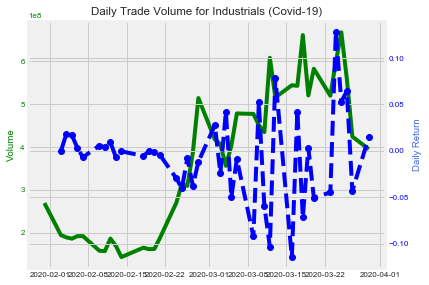

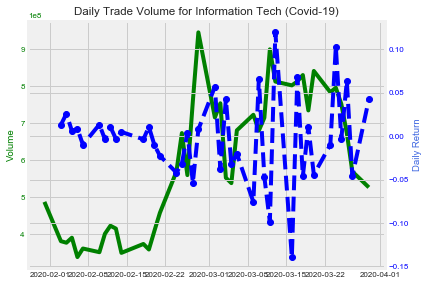

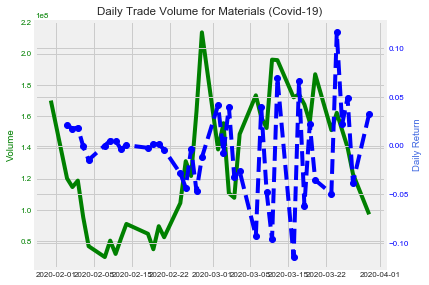

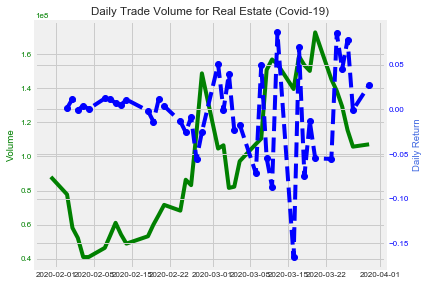

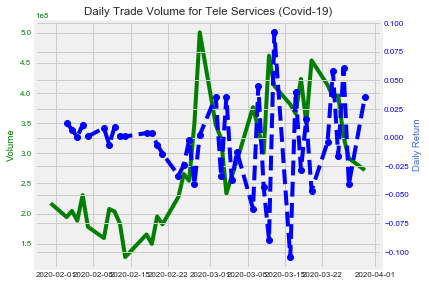

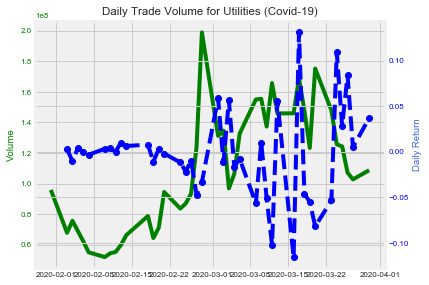

In [31]:
for i in range(11):
    data_1 = thisyear[i-1]['Volume']
    data_2 = thisyear[i-1]['Adj Close'].pct_change()

# Create Plot
    plt.rc('font', size=8)  
    fig, ax1 = plt.subplots() 
    ax1.set_ylabel('Volume', color = 'g')
    ax1.plot(data_1.index, data_1, color = 'g') 
    ax1.tick_params(axis ='y', labelcolor = 'g') 
  
    # Adding Twin Axes

    ax2 = ax1.twinx()
  
    ax2.set_ylabel('Daily Return', color = 'royalblue') 
    ax2.plot(data_2.index, data_2, color = 'b', linestyle='--', marker='o') 
    ax2.tick_params(axis ='y', labelcolor = 'b') 
#     plt.xticks(rotation=15)
    plt.title(f"Daily Trade Volume for {sector_name[i-1]} ({Period})")
#     plt.figure(figsize=(10, 6))
    plt.tight_layout()

    plt.savefig(f"Daily Trade Volume for {sector_name[i-1]} ({Period}).png")



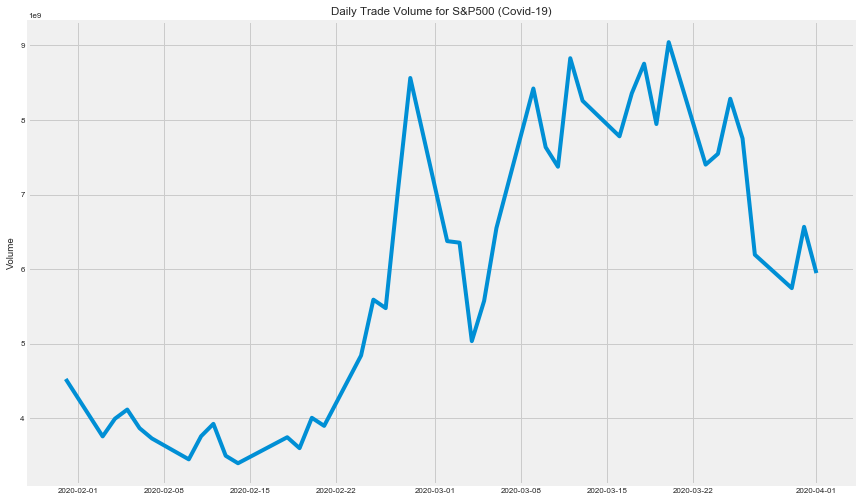

In [32]:
SP500_df_volume = pd.DataFrame(DataReader('^GSPC', 'yahoo', this_year_start, this_year_end)['Volume'])
plt.figure(figsize=(12, 7))
plt.plot(SP500_df.index,SP500_df_volume['Volume'])
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Daily Trade Volume for S&P500 ({Period})")
plt.tight_layout()
plt.savefig(f"Daily Trade Volume for S&P500 ({Period}).png")   

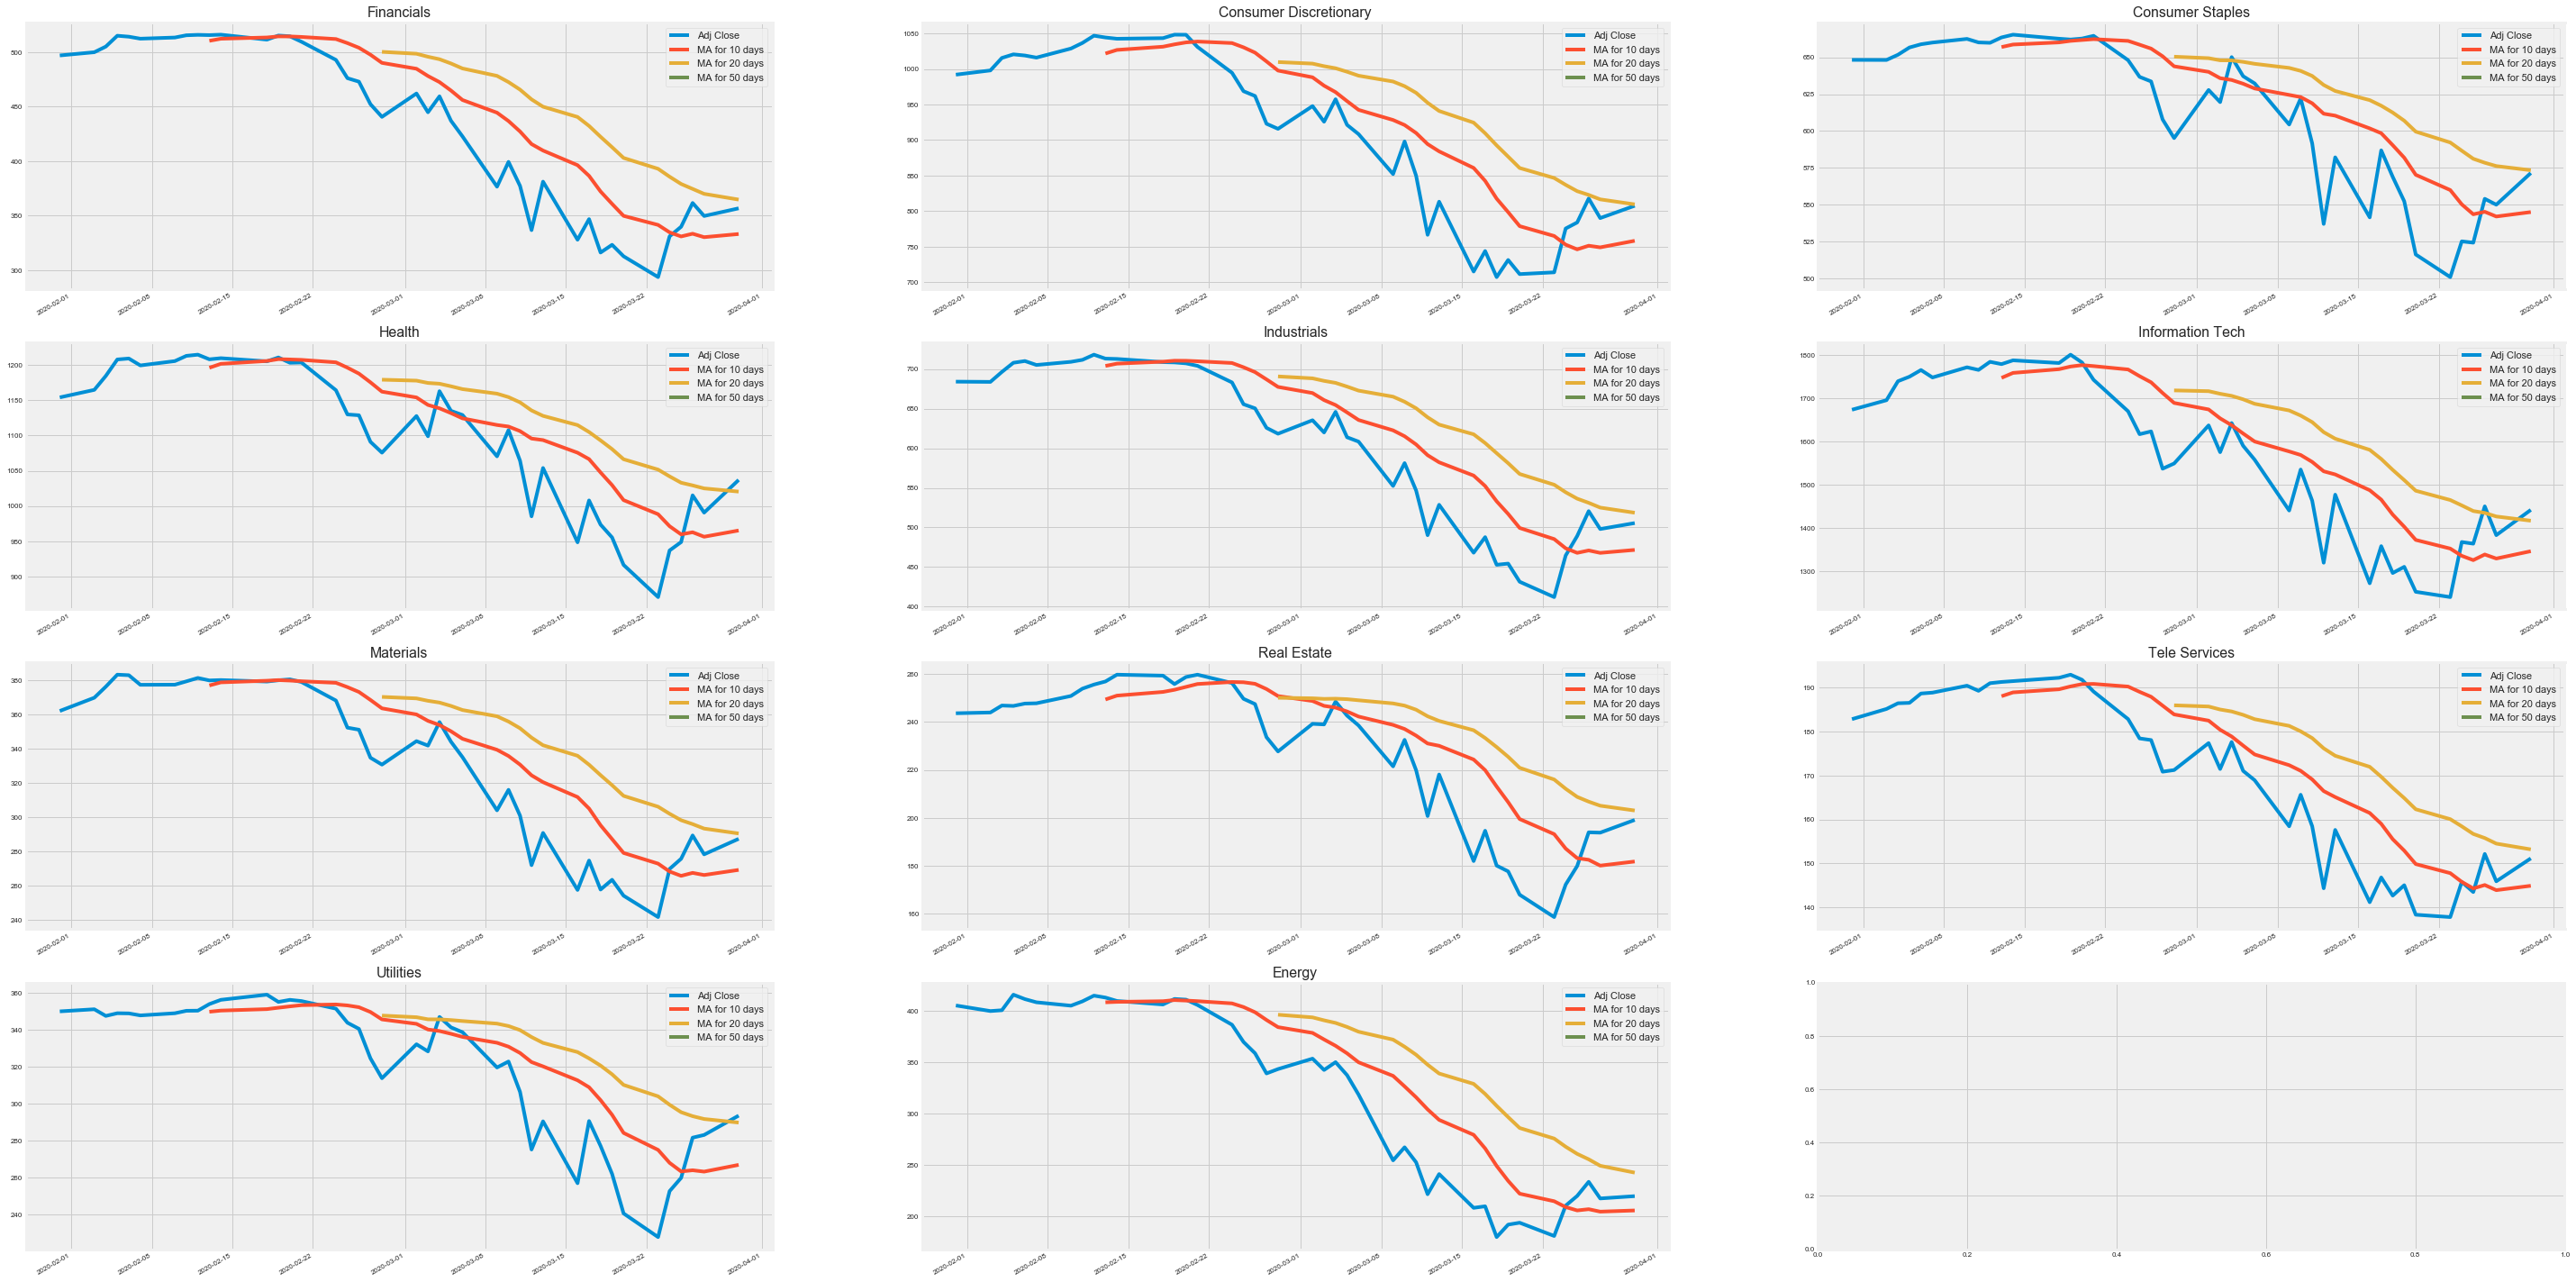

In [33]:
ma_day = [10, 20, 50]
for ma in ma_day:
    for i, sector in enumerate(sector_list, 1):
        column_name = f"MA for {ma} days"
        thisyear[i-1][column_name] = thisyear[i-1]['Adj Close'].rolling(ma).mean()
fig, axes = plt.subplots(nrows=4, ncols=3)
plt.rc('font', size=11) 

fig.set_figheight(27.81)
fig.set_figwidth(45)
thisyear[0][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_xlabel(None)
axes[0,0].set_title(f'{sector_name[0]}')
thisyear[1][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_xlabel(None)
axes[0,1].set_title(f'{sector_name[1]}')
thisyear[2][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,2])
axes[0,2].set_xlabel(None)
axes[0,2].set_title(f'{sector_name[2]}')
thisyear[3][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_xlabel(None)
axes[1,0].set_title(f'{sector_name[3]}')
thisyear[4][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_xlabel(None)
axes[1,1].set_title(f'{sector_name[4]}')
thisyear[5][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,2])
axes[1,2].set_xlabel(None)
axes[1,2].set_title(f'{sector_name[5]}')
thisyear[6][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_xlabel(None)
axes[2,0].set_title(f'{sector_name[6]}')
thisyear[7][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_xlabel(None)
axes[2,1].set_title(f'{sector_name[7]}')
thisyear[8][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,2])
axes[2,2].set_xlabel(None)
axes[2,2].set_title(f'{sector_name[8]}')
thisyear[9][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,0])
axes[3,0].set_xlabel(None)
axes[3,0].set_title(f'{sector_name[9]}')
thisyear[10][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,1])
axes[3,1].set_xlabel(None)
axes[3,1].set_title(f'{sector_name[10]}')
plt.savefig(f"MA by Sectors ({Period}).png")        


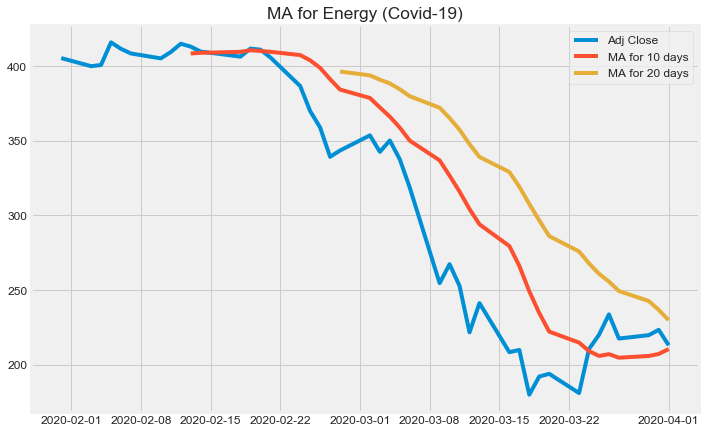

In [34]:
energy_df = pd.DataFrame(DataReader("^GSPE", 'yahoo', this_year_start, this_year_end)['Adj Close'])
ma_day = [10, 20]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    energy_df[column_name] = energy_df['Adj Close'].rolling(ma).mean()
    
plt.figure(figsize=(10,6.18))
plt.rc('font', size=12) 
plt.plot(energy_df[['Adj Close', 'MA for 10 days', 'MA for 20 days']].index,energy_df[['Adj Close', 'MA for 10 days', 'MA for 20 days']])
plt.legend(energy_df)
plt.xlabel(None)
plt.title(f"MA for Energy ({Period})")
plt.tight_layout()
plt.savefig(f"MA for Energy ({Period}).png")    

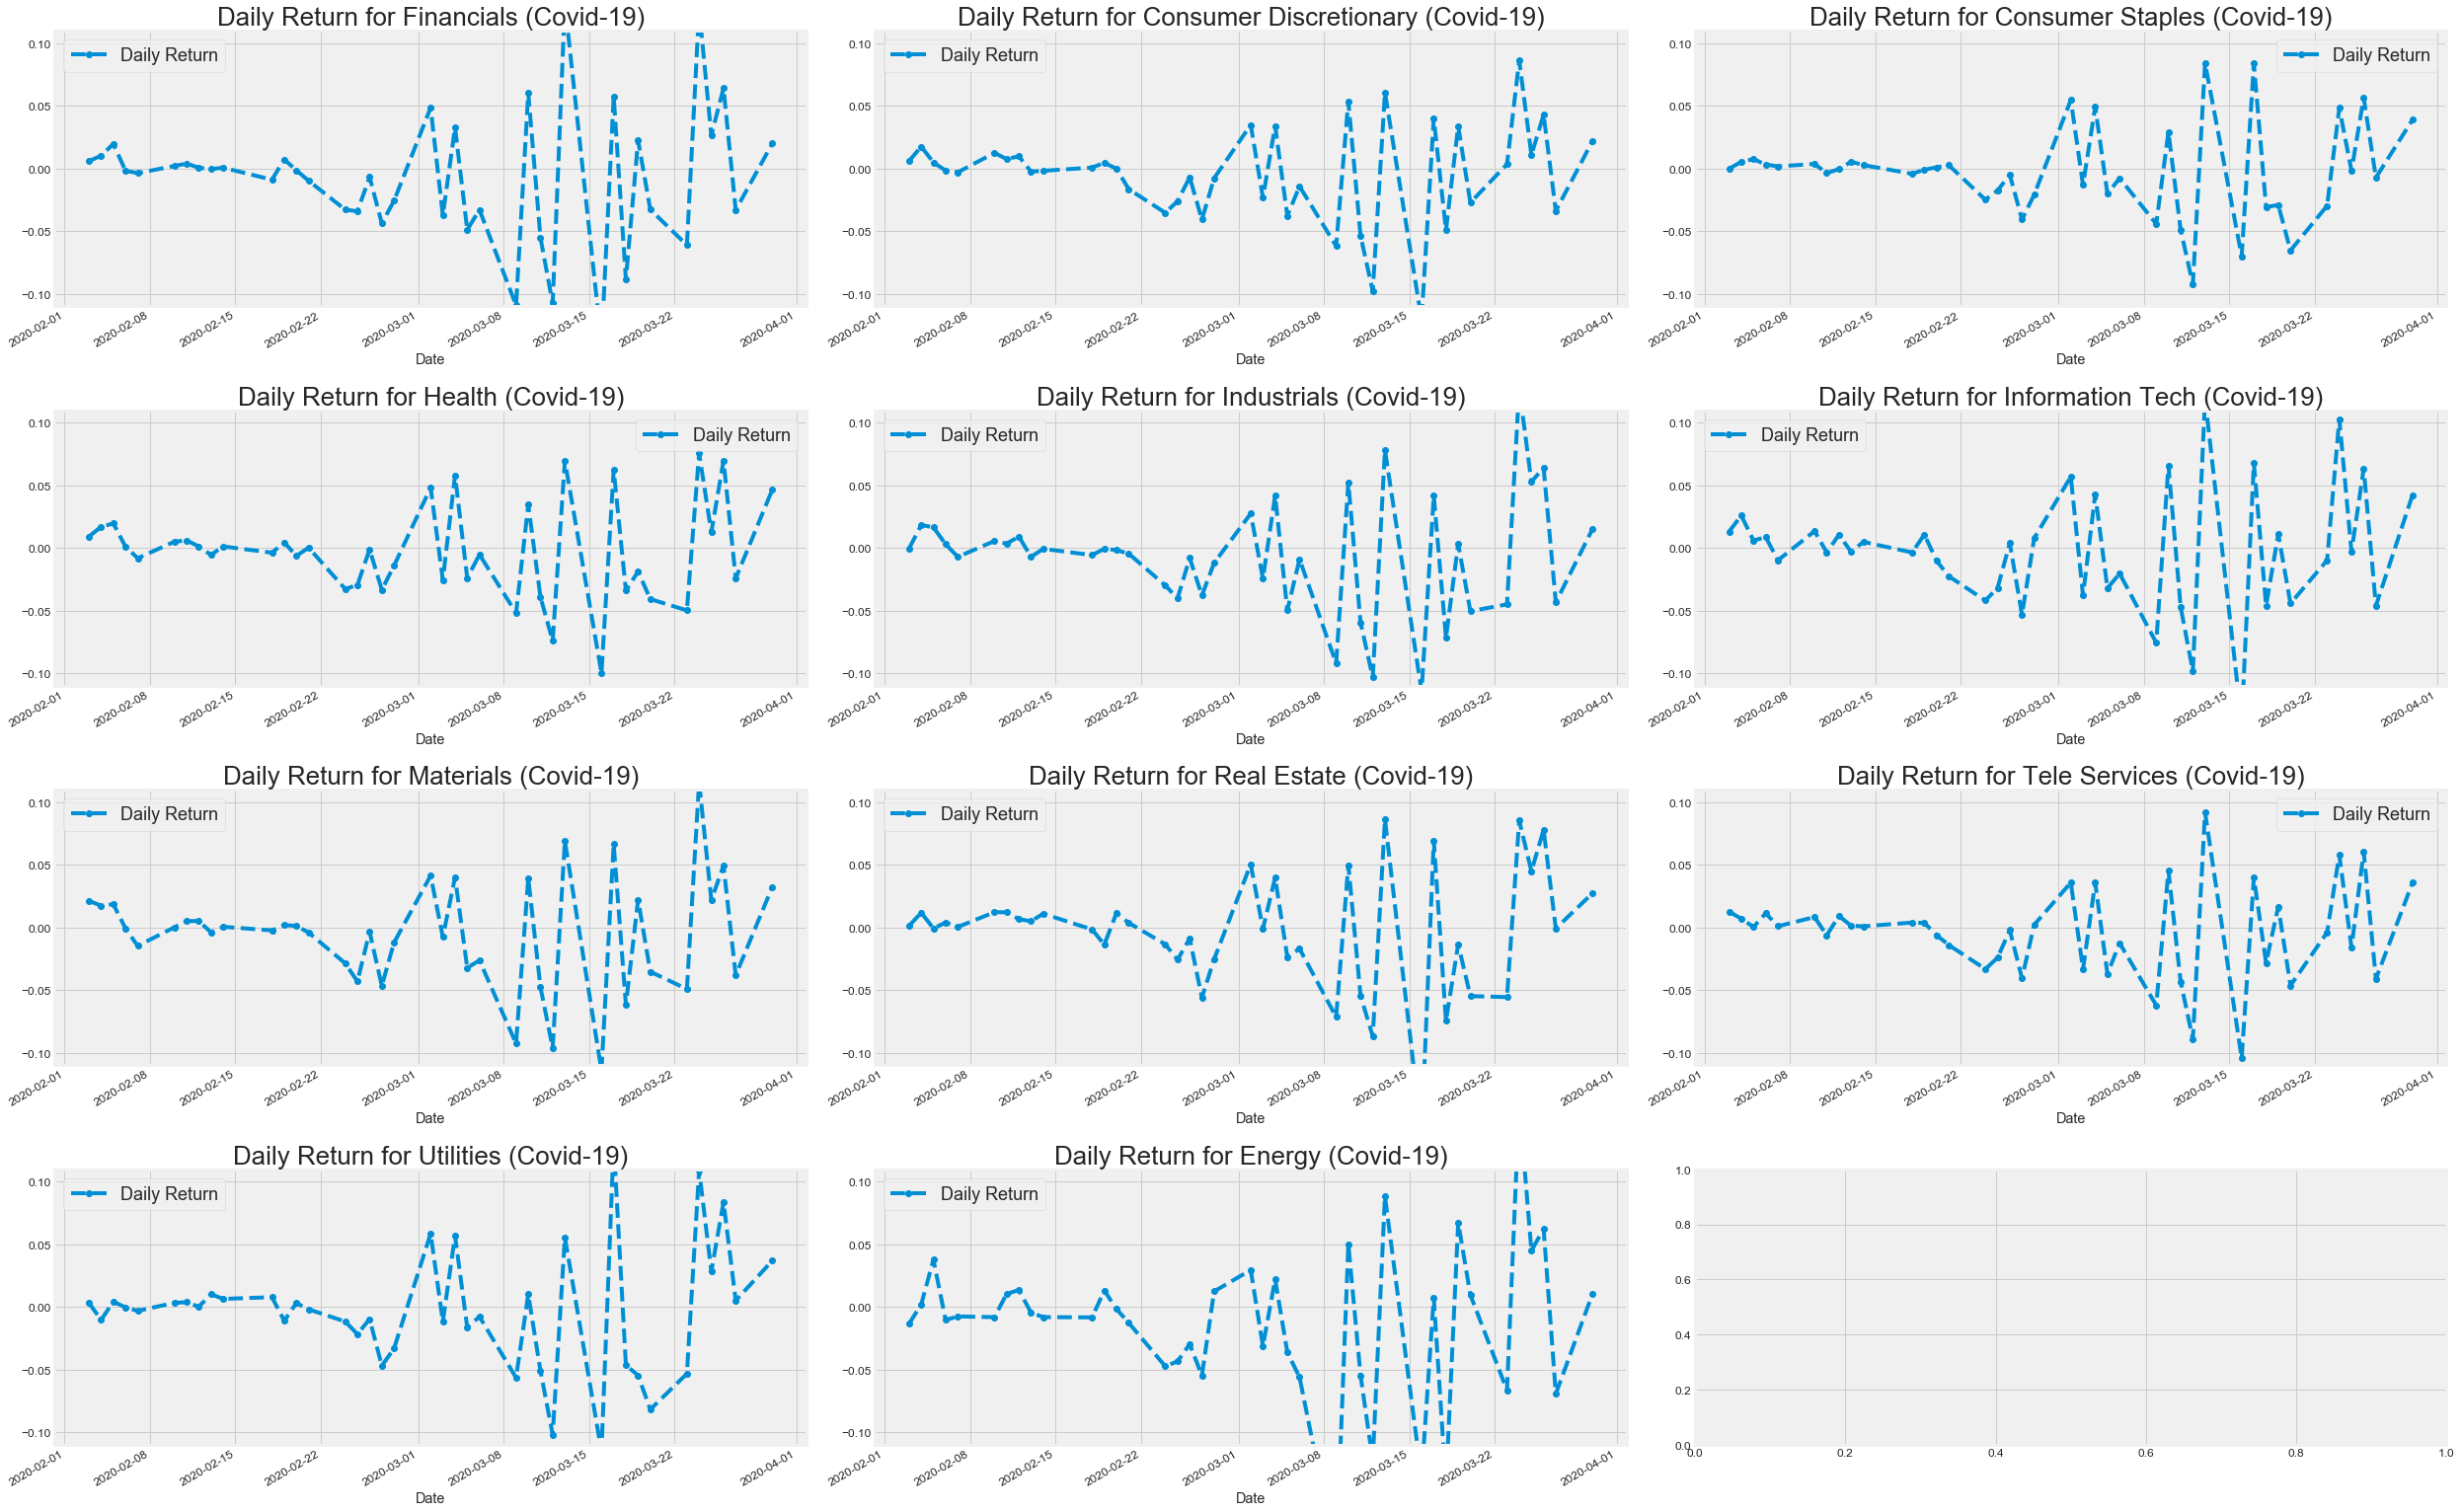

In [35]:
for i, sector in enumerate(sector_list, 1):
    thisyear[i-1]['Daily Return'] = thisyear[i-1]['Adj Close'].pct_change()
fig, axes = plt.subplots(nrows=4, ncols=3)
plt.rc('font', size=18) 

# plt.figure(figsize=(20, 12.36))
fig.set_figheight(21.63)
fig.set_figwidth(35)
# plt.figure(figsize=(35, 21.63))

plt.xlabel(None)

thisyear[0]['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title(f'Daily Return for {sector_name[0]} ({Period})')
# plt.rc('font', size=18) 
axes[0,0].set_ylim([-0.11,0.11])
thisyear[1]['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title(f'Daily Return for {sector_name[1]} ({Period})')
axes[0,1].set_ylim([-0.11,0.11])
thisyear[2]['Daily Return'].plot(ax=axes[0,2], legend=True, linestyle='--', marker='o')
axes[0,2].set_title(f'Daily Return for {sector_name[2]} ({Period})')
axes[0,2].set_ylim([-0.11,0.11])
thisyear[3]['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title(f'Daily Return for {sector_name[3]} ({Period})')
axes[1,0].set_ylim([-0.11,0.11])
thisyear[4]['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title(f'Daily Return for {sector_name[4]} ({Period})')
axes[1,1].set_ylim([-0.11,0.11])
thisyear[5]['Daily Return'].plot(ax=axes[1,2], legend=True, linestyle='--', marker='o')
axes[1,2].set_title(f'Daily Return for {sector_name[5]} ({Period})')
axes[1,2].set_ylim([-0.11,0.11])
thisyear[6]['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title(f'Daily Return for {sector_name[6]} ({Period})')
axes[2,0].set_ylim([-0.11,0.11])
thisyear[7]['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title(f'Daily Return for {sector_name[7]} ({Period})')
axes[2,1].set_ylim([-0.11,0.11])
thisyear[8]['Daily Return'].plot(ax=axes[2,2], legend=True, linestyle='--', marker='o')
axes[2,2].set_title(f'Daily Return for {sector_name[8]} ({Period})')
axes[2,2].set_ylim([-0.11,0.11])
thisyear[9]['Daily Return'].plot(ax=axes[3,0], legend=True, linestyle='--', marker='o')
axes[3,0].set_title(f'Daily Return for {sector_name[9]} ({Period})')
axes[3,0].set_ylim([-0.11,0.11])
thisyear[10]['Daily Return'].plot(ax=axes[3,1], legend=True, linestyle='--', marker='o')
axes[3,1].set_title(f'Daily Return for {sector_name[10]} ({Period})')
axes[3,1].set_ylim([-0.11,0.11])
fig.tight_layout()
plt.savefig(f"Daily Return by Sectors ({Period}).png")        


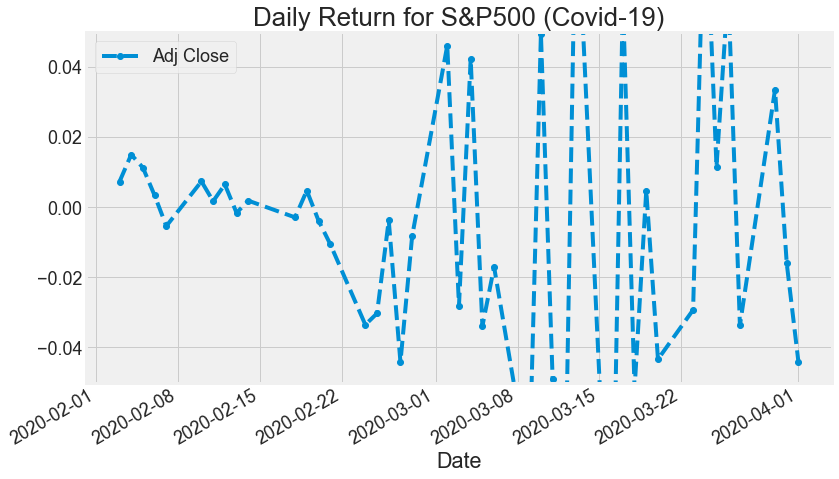

In [36]:
plt.figure(figsize=(12, 7))
SP500_df['Adj Close'].pct_change().plot( legend=True, linestyle='--', marker='o')
plt.ylabel(None)
plt.title(f"Daily Return for S&P500 ({Period})")
plt.ylim([-0.05,0.05])
plt.tight_layout()
plt.savefig(f"Daily Return for S&P500 ({Period}).png")    

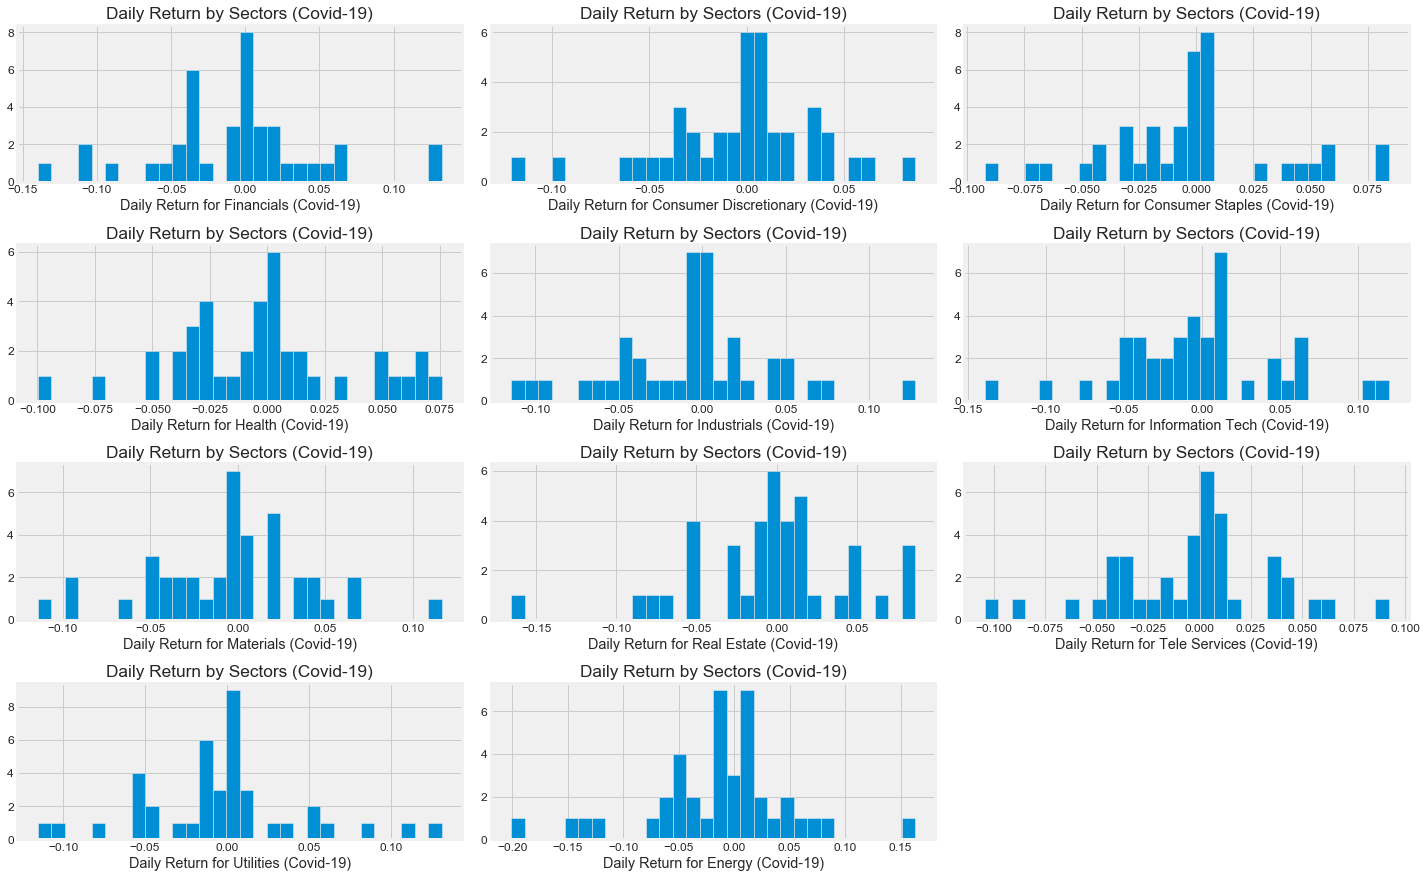

In [37]:
plt.figure(figsize=(20, 12.36))
plt.rc('font', size=12) 
for i, sector in enumerate(sector_list, 1):
    plt.subplot(4, 3, i)
    thisyear[i-1]['Daily Return'].hist(bins=30)
    plt.ylabel(None)
    plt.xlabel(f'Daily Return for {sector_name[i - 1]} ({Period})')
    plt.title(f'Daily Return by Sectors ({Period})')   
plt.tight_layout()

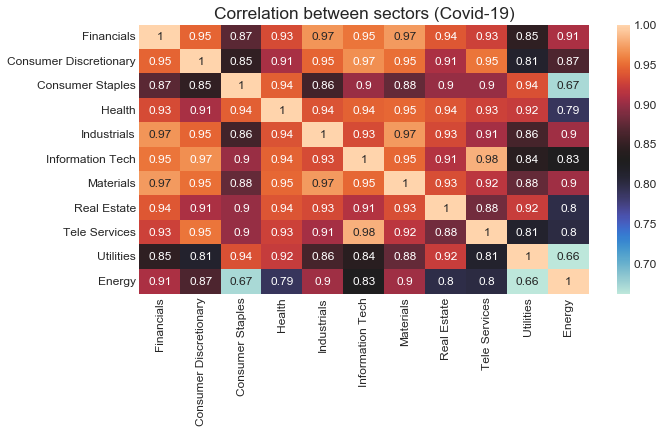

In [38]:
closing_this_year_df = DataReader(sector_list, 'yahoo', this_year_start, this_year_end)['Adj Close']
sector_rate = closing_this_year_df.pct_change()
sector_rate.rename(columns={'^SP500-40':"Financials",'^SP500-25':"Consumer Discretionary",
                            '^SP500-30':"Consumer Staples","^SP500-35":"Health","^SP500-20":"Industrials",
                            "^SP500-45":"Information Tech","^SP500-15":"Materials","^SP500-60":"Real Estate",
                            "^SP500-50":"Tele Services","^SP500-55":"Utilities","^GSPE":"Energy"}, inplace=True)
plt.figure(figsize=(10,6.18))
sns.heatmap(sector_rate.corr(), annot=True, cmap='icefire')
plt.xlabel(None)
plt.ylabel(None)
plt.title(f'Correlation between sectors ({Period})')   
plt.tight_layout()
plt.savefig(f"Correlation by Sectors ({Period}).png")


<Figure size 2880x1779.84 with 0 Axes>

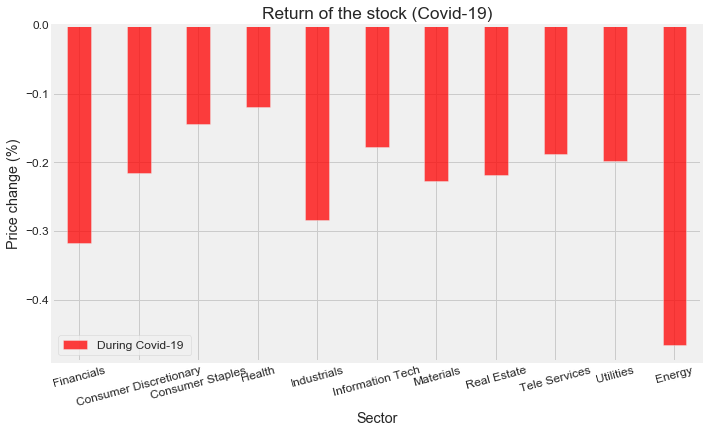

In [39]:
closing_end = DataReader(sector_list, 'yahoo', this_year_end, this_year_end)['Adj Close']
opening_start = DataReader(sector_list, 'yahoo', this_year_start, this_year_start)['Open']

period_return_list=[]
for q in sector_list:
    period_return_list.append((closing_end.loc[closing_end.index.min(),q]-opening_start.loc[opening_start.index.min(),q])/opening_start.loc[opening_start.index.min(),q])
period_return_list

period_return = {f'During {Period} ': period_return_list}
period_return_df = pd.DataFrame(period_return)
period_return_df.index = sector_name

# Creat the chart
x_axis = np.arange(len(sector_list))
tick_locations = [value for value in x_axis]
colors = []
for value in period_return_list:
    if value <0:
        colors.append('r')
    else:
        colors.append('r')

plt.figure(figsize=(40,24.72))
plt.rc('font', size=12)

period_return_df.plot(kind="bar",color = colors, alpha=0.75, align="center",width=0.4,figsize=(10, 6.18))

plt.xticks(tick_locations, rotation=15)
# Set appearance
plt.title(f"Return of the stock ({Period})")
plt.xlabel("Sector")
plt.ylabel("Price change (%)")
plt.tight_layout()
plt.savefig(f"Return of the stock ({Period}).png")        

In [40]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(sector_list, 'yahoo', this_year_start, this_year_end)['Adj Close']
sector_rets = closing_df.pct_change().dropna()
sector_rets.rename(columns={'^GSPC':"S&P500",'^SP500-40':"Financials",'^SP500-25':"Consumer Discretionary",
                            '^SP500-30':"Consumer Staples","^SP500-35":"Health","^SP500-20":"Industrials",
                            "^SP500-45":"Information Tech","^SP500-15":"Materials","^SP500-60":"Real Estate",
                            "^SP500-50":"Tele Services","^SP500-55":"Utilities","^GSPE":"Energy"}, inplace=True)
sector_rets.head()

Symbols,Financials,Consumer Discretionary,Consumer Staples,Health,Industrials,Information Tech,Materials,Real Estate,Tele Services,Utilities,Energy
Date,,,,,,,,,,,
2020-02-03,0.005955,0.005998,-0.000093,0.009255,-0.000409,0.013191,0.021354,0.001314,0.012689,0.003256,-0.013393
2020-02-04,0.010379,0.017616,0.005461,0.016975,0.018396,0.025985,0.017446,0.011888,0.007021,-0.010279,0.001975
2020-02-05,0.019693,0.004953,0.007580,0.019672,0.016614,0.006029,0.018635,-0.000689,0.000483,0.004200,0.037823
2020-02-06,-0.001689,-0.001568,0.003305,0.001110,0.003079,0.008826,-0.000809,0.004013,0.011418,-0.000258,-0.010409
2020-02-07,-0.003578,-0.002915,0.001776,-0.008089,-0.006998,-0.009774,-0.014626,0.000485,0.001060,-0.003123,-0.007507


The pearson correlation coefficient is: 0.9468218077820145
The p-value is: 2.6420237258981407e-21


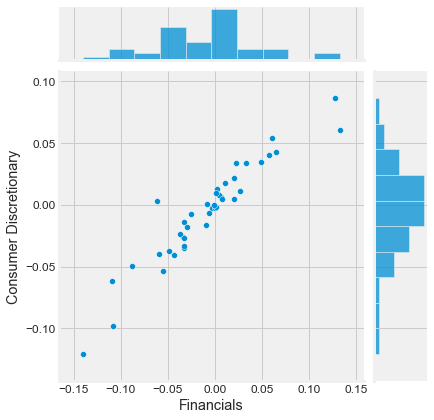

In [41]:
import scipy
from scipy import stats
p = sns.jointplot( data=sector_rets, x = "Financials", y='Consumer Discretionary',kind='scatter')
r, p = scipy.stats.pearsonr(sector_rets["Financials"], sector_rets['Consumer Discretionary'])
print("The pearson correlation coefficient is:", r)
print("The p-value is:", p)

/Users/ash/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


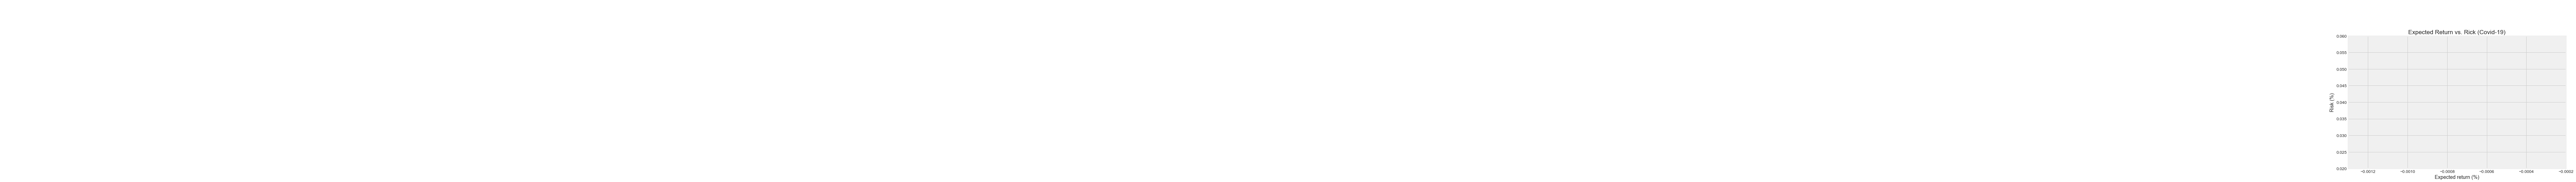

In [42]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = sector_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlim(-0.0013,-0.0002)
plt.ylim(0.02,0.06)
plt.xlabel('Expected return (%)')
plt.ylabel('Risk (%)')
# plt.xlabel(None)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.title(f"Expected Return vs. Rick ({Period})")
plt.tight_layout()
plt.savefig(f"Expected Return vs. Rick ({Period}).png")  

In [43]:
rets['Consumer Staples'].quantile(0.05)

-0.0645171459919573

In [44]:
rets['Energy'].quantile(0.05)

-0.1356020282438893

In [45]:
rets['Financials'].quantile(0.05)

-0.10675057684601252